This Colab notebook can be used for conducting

# Sentiment analysis.

To begin, go to File > Save a Copy in Drive. Use your copy, not this one.

To use Google Colab, you always need to do the following two things:

1) Click "Connect" at the upper right. This connects you to Google servers that will run your script.

2) Upload whatever texts you want to use as files by clicking on the File Folder icon at left. These files won't stay there over time, so store them yourself and upload them here when you intend to use them.

# Vader Sentiment

is a sentiment analysis tool developed for use with social media texts.

https://vadersentiment.readthedocs.io/en/latest/index.html



# This notebook requires

One CSV file with multiple texts to compare aligned in a single column

OR

One CSV file with multiple texts to compare aligned in multiple columns.

In [1]:
# This code cell installs Vader in this notebook so that we can use it.

!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [2]:
# This code cell imports other tools we need to do the analysis.

import pandas as pd
import numpy as np
import re,os,json
import seaborn as sns
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Then, it loads some example sentences and conducts an analysis to show how VADER works.
# It gives each sentence three types of scores, then combines them into a "compound" score.

# --- example sentences -------

sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [3]:
# This code cell intakes the CSV file containing the answers to the questions.

# This will not work unless you have uploaded the file to Colab.

# If you want to use this notebook with a different file,
# upload a different file and change the filename here.

filename = 'ladygaga_all_lyrics.csv' # @param {type:"string"}

ignore_cols = 3 # @param {type:"integer"}
# Columns for respondents information to be ignored for the analysis.

data = pd.read_csv(filename)

In [4]:
# This shows the header columns
cols = list(data.columns[ignore_cols:].values)

In [5]:
# This imports the NLTK library for language processing tasks.
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
# This code cell add VaderSentiments compound scores for each of the columns as a new column
for col in cols:
  data["vs__"+col] = data[col].apply(lambda s: analyzer.polarity_scores(s)['compound'])

In [7]:
# This code cell add VaderSentiments compound scores for each of the columns as a new column,  with sentence segmentation
from statistics import mean
for col in cols:
  data["vs__"+col] = data[col].apply(lambda para: mean([analyzer.polarity_scores(s)['compound'] for s in nltk.sent_tokenize(para)]))

In [8]:
# This code cell displays first three rows in all columns in the CSV.

for i, row in data.iterrows():
  if i < 3:
    print(f"ROW {i} {'':-<85}")
    for col in cols:
      print("{:-<20} {:-<60} {:>7}".format(col, row[col], row["vs__"+col]))
    print()

ROW 0 -------------------------------------------------------------------------------------
lyrics-------------- 
I need you to listen to me, please believe me
I'm completely lonely, please don't judge me
When your tears are falling, I'll catch them as they fall
I need you to listen to me, please don't leave me
I'm not perfect yet, but I'll keep trying
When your tears are falling, I'll catch them as they fall

'Cause inside, we are really made the same (Oh)
In life, waiting's just a stupid game (Oh)

Lift me up, give me a start
'Cause I've been flying with some broken arms
Lift me up, just a small nudge
And I'll be flying like a thousand doves

A thousand do-o-o-o-o-oves
Oh (Doves)
A thousand do-o-o-o-o-oves
Oh (Doves)

I'd do anything for you to really see me
I am human, invisibly bleeding
When your smile is shaking, I'll catch you as you fall

I cry more than I ever say (Oh)
Each time, your love seems to save the day (Oh)

Lift me up, give me a start
'Cause I've been flying with some

In [9]:
# This code cell displays the 10 texts with the highest compound score.
# A high compound score means more positive than negative sentiment.
# You can display more or less than 10 by changing the 10 in the code to a different number.


print ("*** HIGHEST COMPOUND SCORES ***")
for col in cols:
    print(f"{col} {' ':*<80}")
    print(data[[col,'vs__'+col]].sort_values('vs__'+col, ascending=False)[:10])
    print()

*** HIGHEST COMPOUND SCORES ***
lyrics  *******************************************************************************
                                                lyrics  vs__lyrics
251  \nFace down in a pillow, she cries\nHer black ...      0.9998
50   \nOh, disco heaven\nOh, disco heaven\n\nGet ba...      0.9993
79   \n(I'll remember that, I'll remember that)\n(I...      0.9992
23   \nBeautiful, dirty, dirty rich\nRich, dirty, d...      0.9992
209  \n<i>[Romanized:]</i>\n\n<i>[Jennie:]</i>\nSou...      0.9991
201  \nI came down the mountain\nDraggin' our love ...      0.9991
222  \nI'll undress you, 'cause you're tired\nCover...      0.9990
203  \nEh-eh, eh-eh\nYe-ha, ye-ha\nEh-eh, eh-eh\nAh...      0.9988
204  \nStrange dear, but true dear\nWhen I'm close ...      0.9987
200  \n<i>[Lady Gaga:]</i>\nWhen I was young, I pra...      0.9986



In [10]:
# This code cell displays the 10 texts with the lowest compound score.
# A low compound score means more negative than positive sentiment.
# You can display more or less than 10 by changing the 10 in the code to a different number.

print ("*** LOWEST COMPOUND SCORES ***")
for col in cols:
    print(f"{col} {' ':*<80}")
    print(data[[col,'vs__'+col]].sort_values('vs__'+col, ascending=True)[:10])

    print()

*** LOWEST COMPOUND SCORES ***
lyrics  *******************************************************************************
                                                lyrics  vs__lyrics
20   \nWe don't care what people say, we know the t...     -0.9981
138  \nFace down in a pillow, she cries\nHer black ...     -0.9979
145  \nGirl's muscles in my bones\nBut I'm too poor...     -0.9952
163  \nMake the bad boys cry\n\nShe'd let you know ...     -0.9942
146  \nMaybe it's time to let the old ways die\nMay...     -0.9928
173  \n<i>[Lady Gaga:]</i>\nNod if you wanna be hig...     -0.9897
213  \nGot no plans, got no clothes\nGot no piano, ...     -0.9872
187  \nWe gon' grab the mics and get 'em off the wa...     -0.9871
77   \nI woke up chained inside a vacant little roo...     -0.9813
27   \nBlack eyes open wide\nIt's time to testify\n...     -0.9552



# Make a boxplot

from wikipedia:

A boxplot is a standardized way of displaying a dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

Minimum (Q0 or 0th percentile): the lowest data point in the data set

Maximum (Q4 or 100th percentile): the highest data point in the data set

Median (Q2 or 50th percentile): the middle value in the data set

First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), it is the median of the lower half of the dataset.

Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), it is the median of the upper half of the dataset.[7]

[Text(0, 0, 'lyrics')]

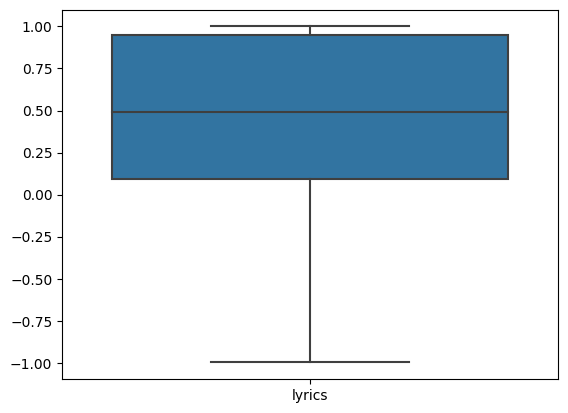

In [11]:
# This code cell combines the average scores into boxplots so the two sets of answers can easily be compared.

ax = sns.boxplot(data=data)
ax.set_xticklabels(cols, rotation=0)



This notebook was developed for CUS4020 Digital Humanities by Lau Chaak Ming.
